In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018]
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']]
lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()
lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()

final_df = res[['Stazione','VALORE']]
final_df['Date'] = lista_date
final_df['LogVal'] = lista_log

final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

/tmp/ipykernel_12578/3124918157.py:5: RuntimeWarning: divide by zero encountered in log
  lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()
/tmp/ipykernel_12578/3124918157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Date'] = lista_date
/tmp/ipykernel_12578/3124918157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['LogVal'] = lista_log


,Stazione,VALORE,Date,LogVal
75727,BADIA,39,2018-01-01,3.663562
75728,BADIA,13,2018-01-02,2.564949
75729,BADIA,12,2018-01-03,2.484907
75730,BADIA,15,2018-01-04,2.708050
75731,BADIA,34,2018-01-05,3.526361


In [5]:
sns.set_theme(style="ticks")

print(len(final_df['Stazione'].drop_duplicates().tolist()))
palette = sns.color_palette("YlOrRd",n_colors=len(final_df['Stazione'].drop_duplicates().tolist()))



49


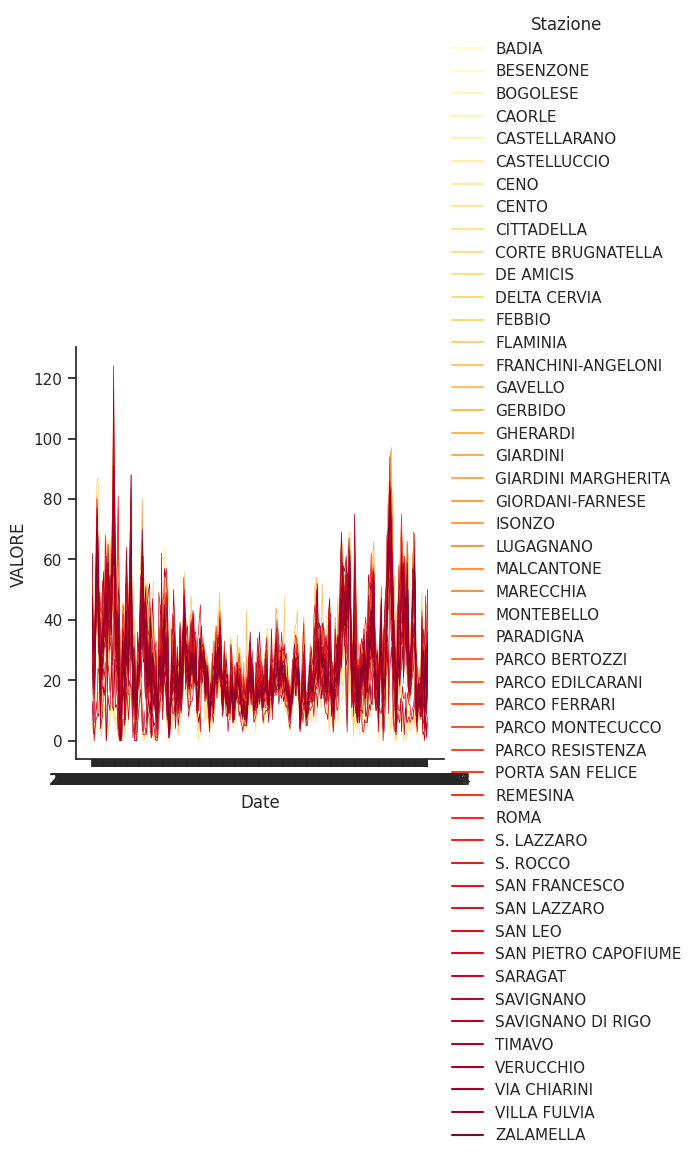

In [6]:
sns.relplot(
    data=final_df,
    x="Date", y="VALORE",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)

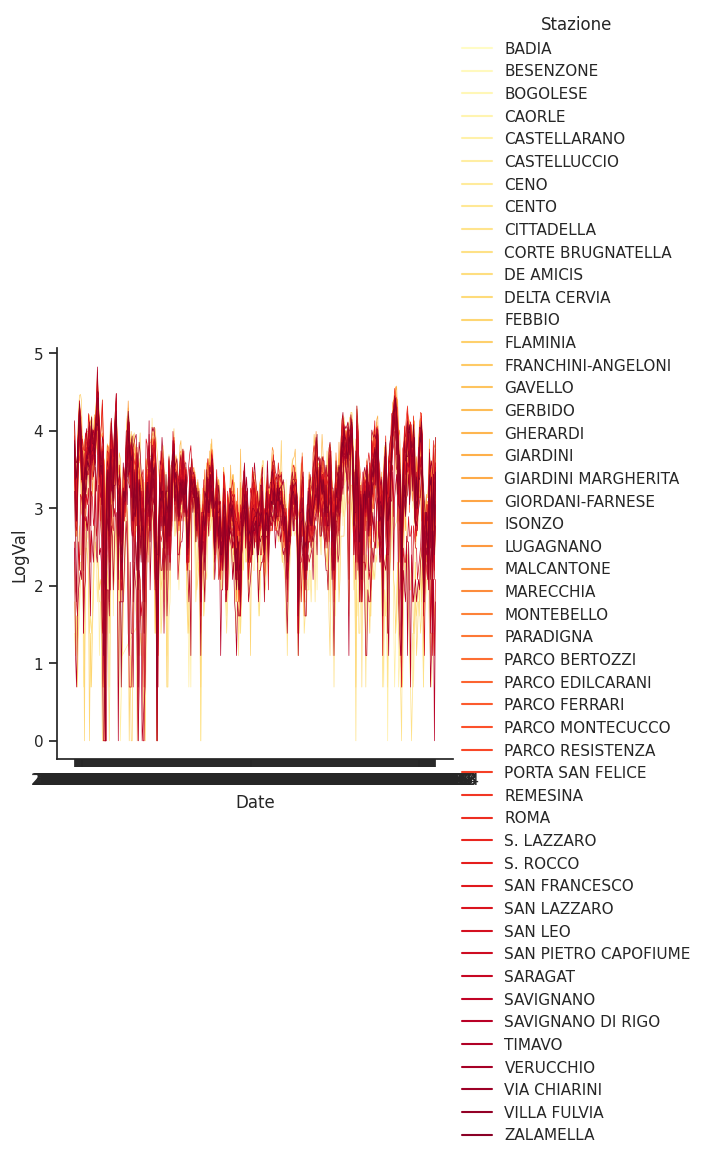

In [7]:

sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)